In [1]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import numpy as np

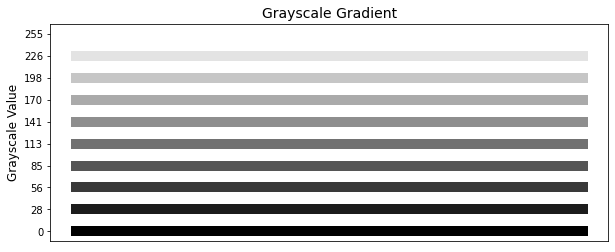

In [2]:
def lin_grayscale(n):
    # Create an array of n different grayscale values ranging from 0 to 255
    grayscale_values = np.linspace(0, 255, n)
    # Create a figure and axis object
    fig, ax = plt.subplots(figsize=(10, 4))
    # Plot each gr
    ayscale value as a horizontal line
    for i, val in enumerate(grayscale_values):
        ax.plot([0, 10], [i, i], color=str(val/255), linewidth=10)
    # Set y-axis ticks and labels
    ax.set_yticks(range(n))
    ax.set_yticklabels([f'{int(val)}' for val in grayscale_values])
    # Remove x-axis ticks and labels
    ax.set_xticks([])
    ax.set_xticklabels([])
    # Set title and labels
    ax.set_title('Grayscale Gradient', fontsize=14)
    ax.set_ylabel('Grayscale Value', fontsize=12)
    # Show the plot
    plt.show()
    
lin_grayscale(10)

---

## Image PIL + numpy array

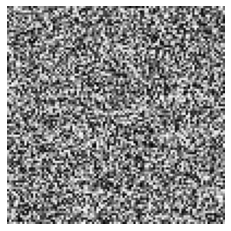

In [3]:
image_array = np.random.rand(100, 100)  # Example random grayscale image

# Plot the grayscale image
plt.imshow(image_array, cmap='gray')
plt.axis('off')  # Turn off axis labels
plt.show()

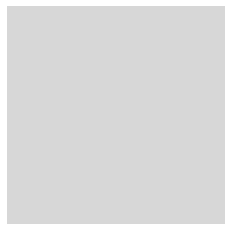

In [4]:
# Example: Create a 100x100 array filled with a constant value
array = np.full((100, 100), 215, dtype=np.uint8)

# Plot the array using imshow
plt.imshow(array, cmap='gray', vmin=0, vmax=255)  # Set vmin and vmax explicitly
plt.axis('off')
plt.show()

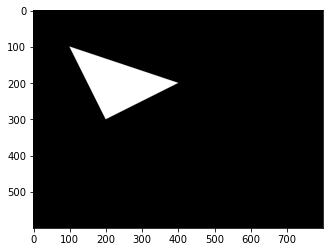

In [5]:
width, height = 800, 600
image = Image.new("L", (width, height), color=0) #black font
polygon_points = [(100, 100), (200, 300), (400, 200)]
draw = ImageDraw.Draw(image)
draw.polygon(polygon_points, fill=255)  # Fill the polygon with white
image_array = np.array(image)
plt.imshow(image_array, cmap='gray')
plt.axis('on') # on/off
plt.show()

In [6]:
draw.polygon([(400, 500), (700, 450), (500, 300)], fill=255)

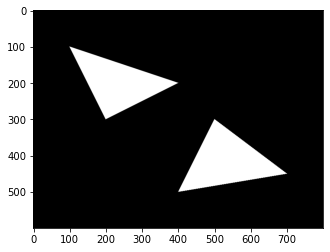

In [7]:
image_array = np.array(image)
plt.imshow(image_array, cmap='gray')
plt.axis('on') # on/off
plt.show()

In [8]:
type(image_array), type(image), type(draw)

(numpy.ndarray, PIL.Image.Image, PIL.ImageDraw.ImageDraw)

In [49]:
image_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

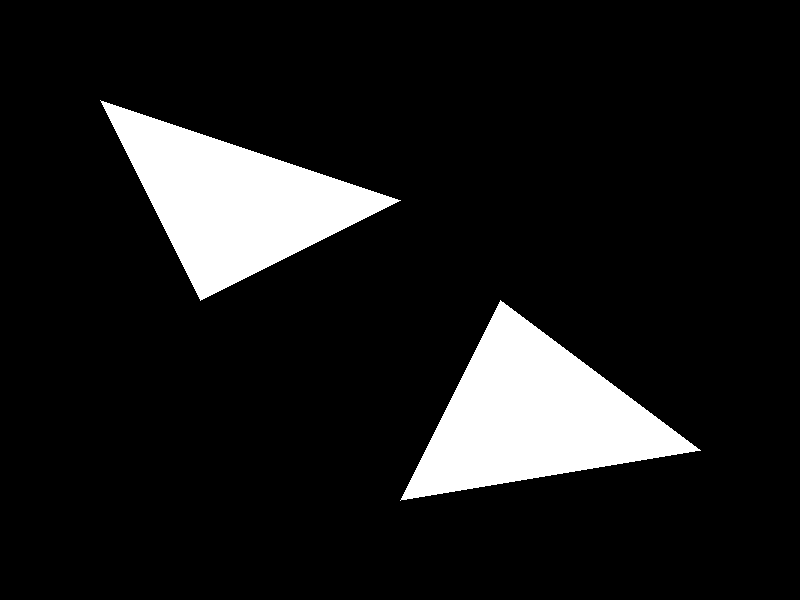

In [10]:
image

In [12]:
image_array.shape #esto está en (filas, columnas)

(600, 800)

In [51]:
image.save('example.png')

In [52]:
del image

In [53]:
image

NameError: name 'image' is not defined

In [54]:
image = Image.open("example.png")

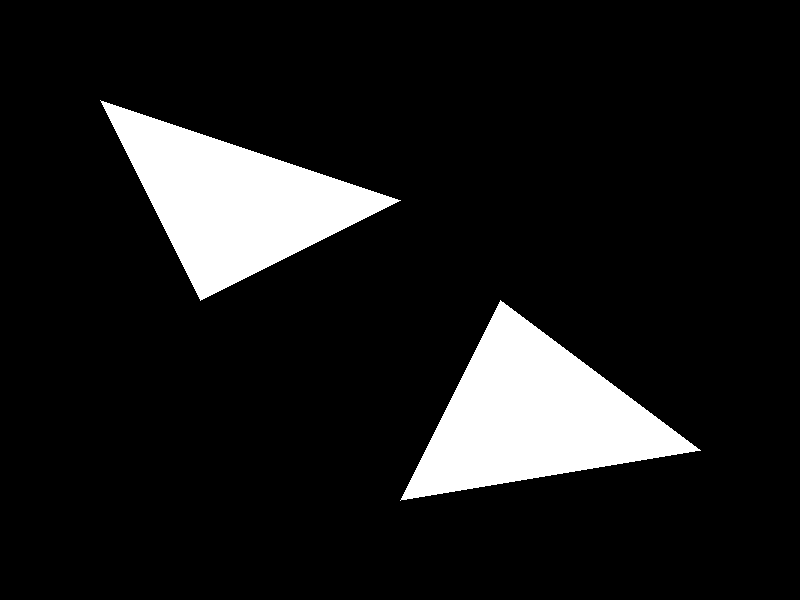

In [55]:
image

In [57]:
image_array=np.array(image)

In [68]:
image_array.shape, image_array.size, image_array.ndim #image_array.shape está en (filas, columnas)

((600, 800), 480000, 2)

In [13]:
draw.polygon([(100, 500), (300, 500), (300, 390), (100, 390)], fill=255)

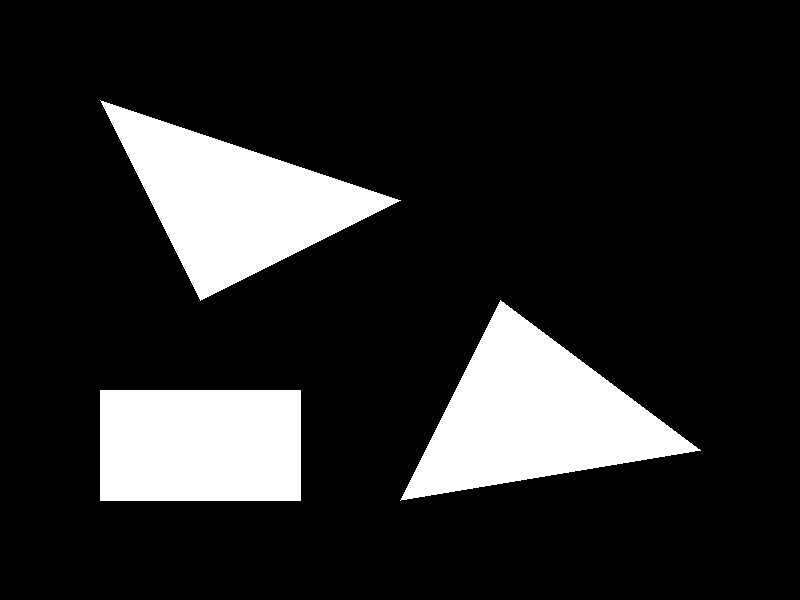

In [14]:
image

In [16]:
image_array=np.array(image)
np.save("example.npy", image_array)

In [17]:
image.save('example.png')

En lo de arriba, los pesos son:
 - png: 3,3 kB
 - npy: 480,1 kB
 
Por tanto, las máscaras serán guardadas como png

In [18]:
del image_array, image

In [19]:
image_array = np.load('example.npy')

In [20]:
image = Image.fromarray(image_array)

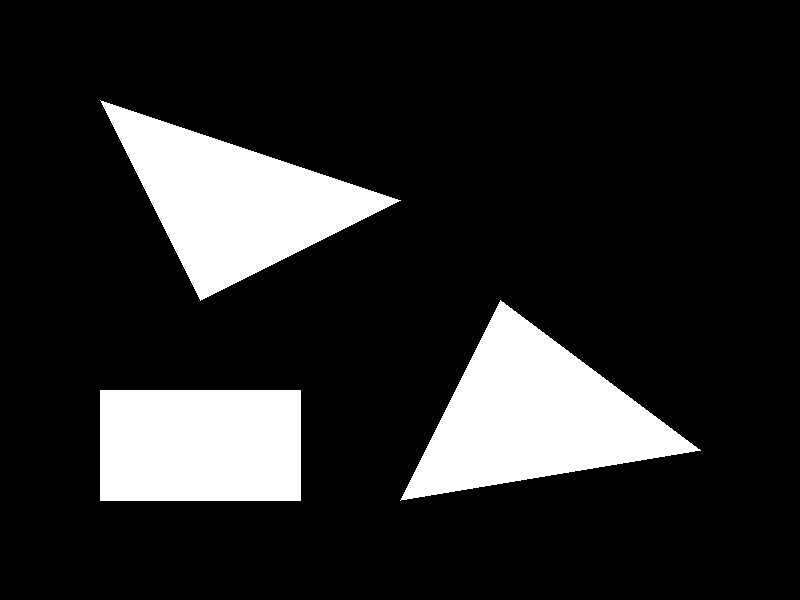

In [21]:
image

----

## Working with foto + mask

In [29]:
image = Image.open("ss.jpg")
image_array=np.array(image)
image_array.shape

(600, 800, 3)

In [30]:
image = Image.open("ss.jpg").convert("RGBA")
image_array=np.array(image)
image_array.shape

(600, 800, 4)

This just draw over the image

In [3]:
# Open the image and convert it to RGBA mode
image = Image.open("/home/user/Documentos/WSI/ss.jpg").convert("RGBA")

# Load the mask (assuming it's a NumPy array with values 0 and 255)
mask = np.array(Image.open("/home/user/Documentos/WSI/example.png").convert("L"))  # Convert to grayscale

# Create a light blue color (RGBA)
light_blue = (173, 216, 230, 28)  # RGB: (173, 216, 230), Alpha: 255

# Create a new image with the same size as the original image and fill it with light blue
overlay = Image.new("RGBA", image.size, light_blue)

# Create a composite image by blending the original image and the overlay using the mask
composite = Image.composite(overlay, image, Image.fromarray(mask))

# Show the composite image
composite.show()

Abriendo en una sesión existente del navegador


This make a translucent mask!

In [4]:
# Open the image and convert it to RGBA mode
image = Image.open("ss.jpg").convert("RGBA")

# Load the mask (assuming it's a NumPy array with values 0 and 255)
mask = np.array(Image.open("example.png").convert("L"))  # Convert to grayscale

# Adjust the alpha channel of the mask to make it translucent
alpha = 120  # Set the alpha value (0-255)  #120-180 buenos valores
mask_with_alpha = np.zeros((mask.shape[0], mask.shape[1], 4), dtype=np.uint8)
mask_with_alpha[:, :, 0] = 255  # Red channel
mask_with_alpha[:, :, 1] = 255  # Green channel
mask_with_alpha[:, :, 2] = 255  # Blue channel
mask_with_alpha[:, :, 3] = mask * alpha  # Alpha channel

# Create a light blue color (RGBA)
light_blue = (173, 216, 230, 255)  # RGB: (173, 216, 230), Alpha: 255

# Create a new image with the same size as the original image and fill it with light blue
overlay = Image.new("RGBA", image.size, light_blue)

# Create a composite image by blending the original image and the overlay using the mask
composite = Image.composite(overlay, image, Image.fromarray(mask_with_alpha))

# Show the composite image
#composite.save('trans.png')
composite.convert('RGB').save('trans.jpeg')

Para el ejemplo de la celda de arriba, con respecto a los formatos:

- RGBA: png --> 1.2 Mb (4 canales: 3color + Alpha)
- RGB: jpeg --> 141 Kb (3 canales básicos de color)

---

## Finding contours in the mask image

In [5]:
import cv2

# Read the black and white image
image = cv2.imread("example.png", cv2.IMREAD_GRAYSCALE)

# Threshold the image to obtain a binary image
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Find contours in the binary image
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

perimeter_coordinates = []
for contour in contours:
    fig = []
    for point in contour:
        x, y = point[0]
        fig.append((x,y))
    perimeter_coordinates.append(fig)

In [6]:
len(perimeter_coordinates), len(perimeter_coordinates[0]), len(perimeter_coordinates[1]), len(perimeter_coordinates[2])

(3, 4, 401, 600)

In [7]:
perimeter_coordinates[0]

[(100, 390), (100, 500), (300, 500), (300, 390)]

Ahora ponemos los poligonos encima de la imagen

In [8]:
# Open the image
image_path = "ss.jpg"
image = Image.open(image_path)

# Define the vertices of the polygon (replace with your own vertices)
#vertices = [(100, 100), (200, 300), (400, 200)]
vertices = perimeter_coordinates[0]

# Create a drawing object
draw = ImageDraw.Draw(image)

# Draw the polygonal shape
#draw.polygon(vertices, outline="red")  # Use 'outline' to specify the color of the lines
for vertices in perimeter_coordinates:
    draw.polygon(vertices, outline="red")

# Save or display the image with the polygonal shape
#image.show()
#image.save("image_with_polygon.png")
image.save("image_with_polygon.jpg")


## Cropping de full Mask

In [48]:
image = Image.open('example.png')  # Replace 'example.jpg' with the path to your image file
#width, height = image.size

left, right, top, bottom = 100, 400, 100, 400

#def crop_mask(point, pix):
#    return point[0], point[1], point[0]+pix, point[1]+pix

def crop_mask(img, point, pix):
    return  img.crop( (point[0], point[1], point[0]+pix, point[1]+pix) )

cropped = crop_mask(image, (500,400), 200)
cropped.show()

#square_sub_image = image.crop((left, top, right, bottom))
#square_sub_image = image.crop( crop_mask((400,200),200) ) 

#square_sub_image.show()  # Display the squared sub-image
# square_sub_image.save('sub_image.jpg')  # Save the squared sub-image to a file

Abriendo en una sesión existente del navegador


[8542:8542:0100/000000.662586:ERROR:zygote_linux.cc(662)] write: Tubería rota (32)


In [12]:
arr = np.array(square_sub_image)
arr.shape

(300, 400)

In [21]:
np.sum(arr, axis=1)/255, len(np.sum(arr, axis=1)) #suma los pix blancos en cada fila

(array([  1.,   2.,   5.,   6.,   8.,  10.,  12.,  13.,  16.,  17.,  19.,
         21.,  23.,  24.,  27.,  28.,  30.,  32.,  34.,  35.,  38.,  39.,
         41.,  43.,  45.,  46.,  49.,  50.,  52.,  54.,  56.,  57.,  60.,
         61.,  63.,  65.,  67.,  68.,  71.,  72.,  74.,  76.,  78.,  79.,
         82.,  83.,  85.,  87.,  89.,  90.,  93.,  94.,  96.,  98., 100.,
        101., 104., 105., 107., 109., 111., 112., 115., 116., 118., 120.,
        122., 123., 126., 127., 129., 131., 133., 134., 137., 138., 140.,
        142., 144., 145., 148., 149., 151., 153., 155., 156., 159., 160.,
        162., 164., 166., 167., 170., 171., 173., 175., 177., 178., 181.,
        182., 184., 186., 188., 189., 192., 193., 195., 197., 199., 200.,
        203., 204., 206., 208., 210., 211., 214., 215., 217., 219., 221.,
        222., 225., 226., 228., 230., 232., 233., 236., 237., 239., 241.,
        243., 244., 247., 248., 250., 252., 254., 255., 258., 259., 261.,
        263., 265., 266., 269., 270., 